In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/car data.csv')

In [3]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.642584,0.32,1.2,6.4,9.9,92.6
Driven_kms,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


###1.Data cleaning

        1.checking missing values
        2.convert year to current age of car


   1.checking missing values

In [6]:
df.isna().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


    2.convert year to current age of car

In [7]:
df['car_age']=2025-df['Year']

In [8]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner', 'car_age'],
      dtype='object')

In [9]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,car_age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,11
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,9
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,10
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,16
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,8


###2.Exploratory Data Analysis

            1.checking null values
            2.checking duplicate values
            3.checking outliers
            4.label encoding

 1.checking null values

In [10]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0
car_age,0


2.checking duplicate values

In [11]:
df.duplicated().sum()

np.int64(2)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

np.int64(0)

3.checking outliers

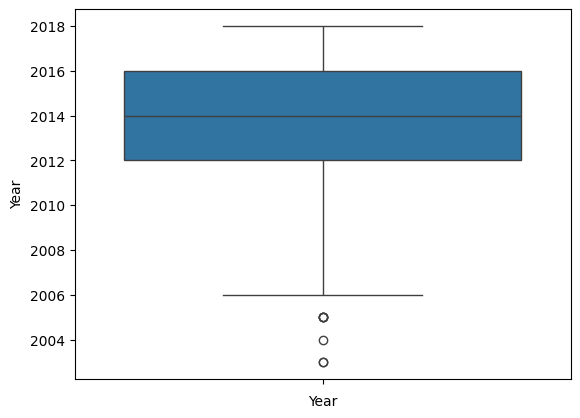

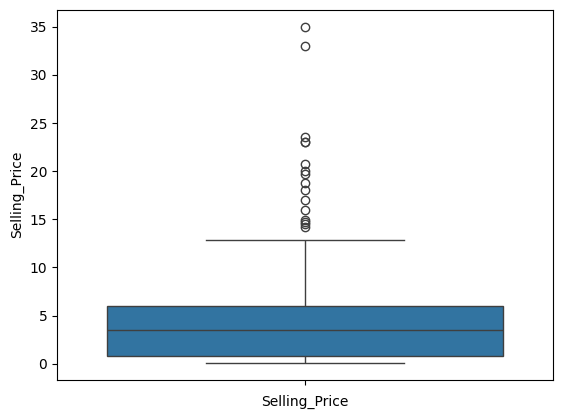

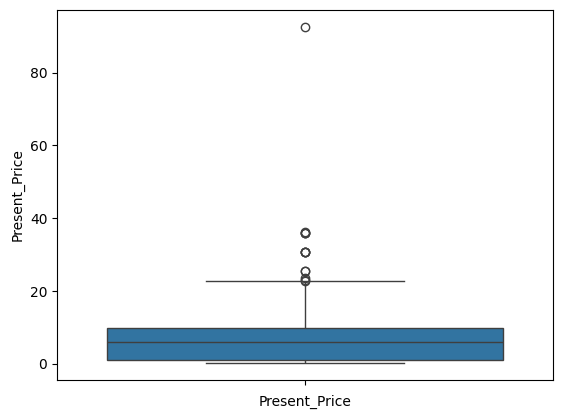

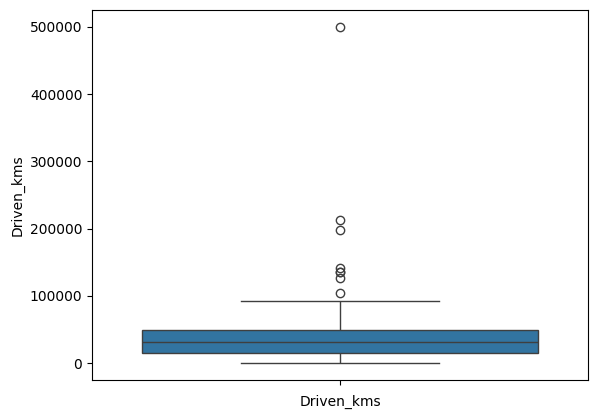

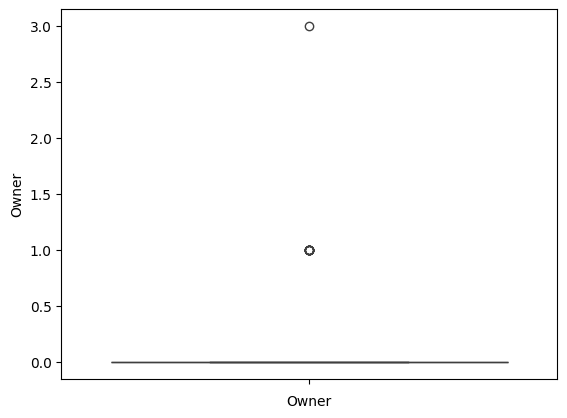

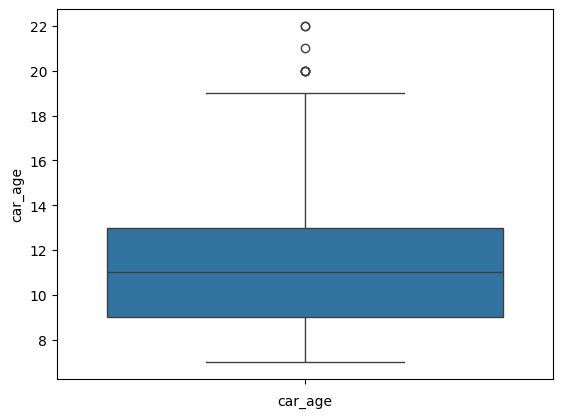

In [14]:
for col in df.columns:
    if(df[col].dtype!='object'):
       sns.boxplot(df[col])
       plt.xlabel(col)
       plt.show()

In [15]:


out_list=['Year','Selling_Price','Present_Price','Driven_kms','car_age']
for col in out_list:
    if df[col].dtype==['int64','float64'] :
         q1=df[col].quantile(0.25)
         q3=df[col].quantile(0.75)
         iqr=q3-q1
         upper_bound=q3+(1.5*iqr)
         lower_bound=q1-(1.5*iqr)
         df[col]=df[(df[col]>=upper_bound) & (df[col]<=lower_bound)]

4.label encoding

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()
for col in df.columns:
    if(df[col].dtype=='object'):
      df[col]=le.fit_transform(df[col])

In [18]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,car_age
0,90,2014,3.35,5.59,27000,2,0,1,0,11
1,93,2013,4.75,9.54,43000,1,0,1,0,12
2,68,2017,7.25,9.85,6900,2,0,1,0,8
3,96,2011,2.85,4.15,5200,2,0,1,0,14
4,92,2014,4.60,6.87,42450,1,0,1,0,11
...,...,...,...,...,...,...,...,...,...,...
296,69,2016,9.50,11.60,33988,1,0,1,0,9
297,66,2015,4.00,5.90,60000,2,0,1,0,10
298,69,2009,3.35,11.00,87934,2,0,1,0,16
299,69,2017,11.50,12.50,9000,1,0,1,0,8


###visualization

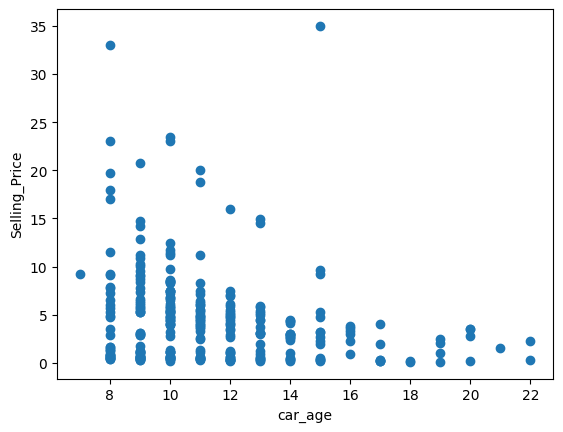

In [19]:
plt.scatter(df['car_age'],df['Selling_Price'])
plt.xlabel('car_age')
plt.ylabel('Selling_Price')
plt.show()

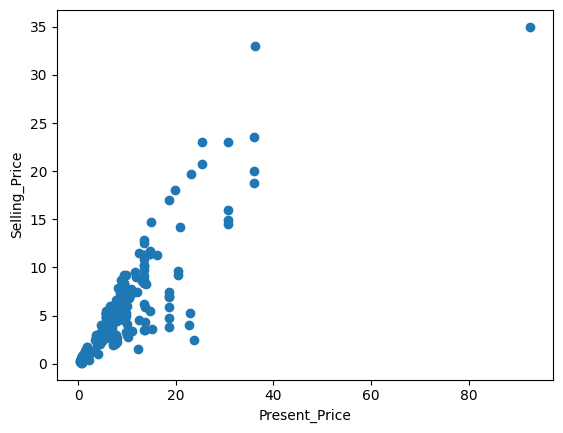

In [20]:
plt.scatter(df['Present_Price'],df['Selling_Price'])
plt.xlabel('Present_Price')
plt.ylabel('Selling_Price')
plt.show()

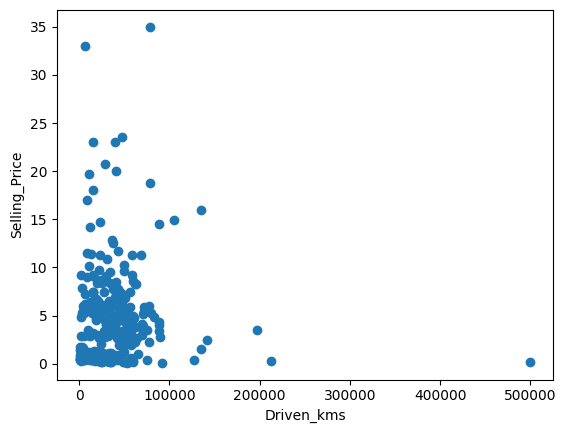

In [21]:
plt.scatter(df['Driven_kms'],df['Selling_Price'])
plt.xlabel('Driven_kms')
plt.ylabel('Selling_Price')
plt.show()

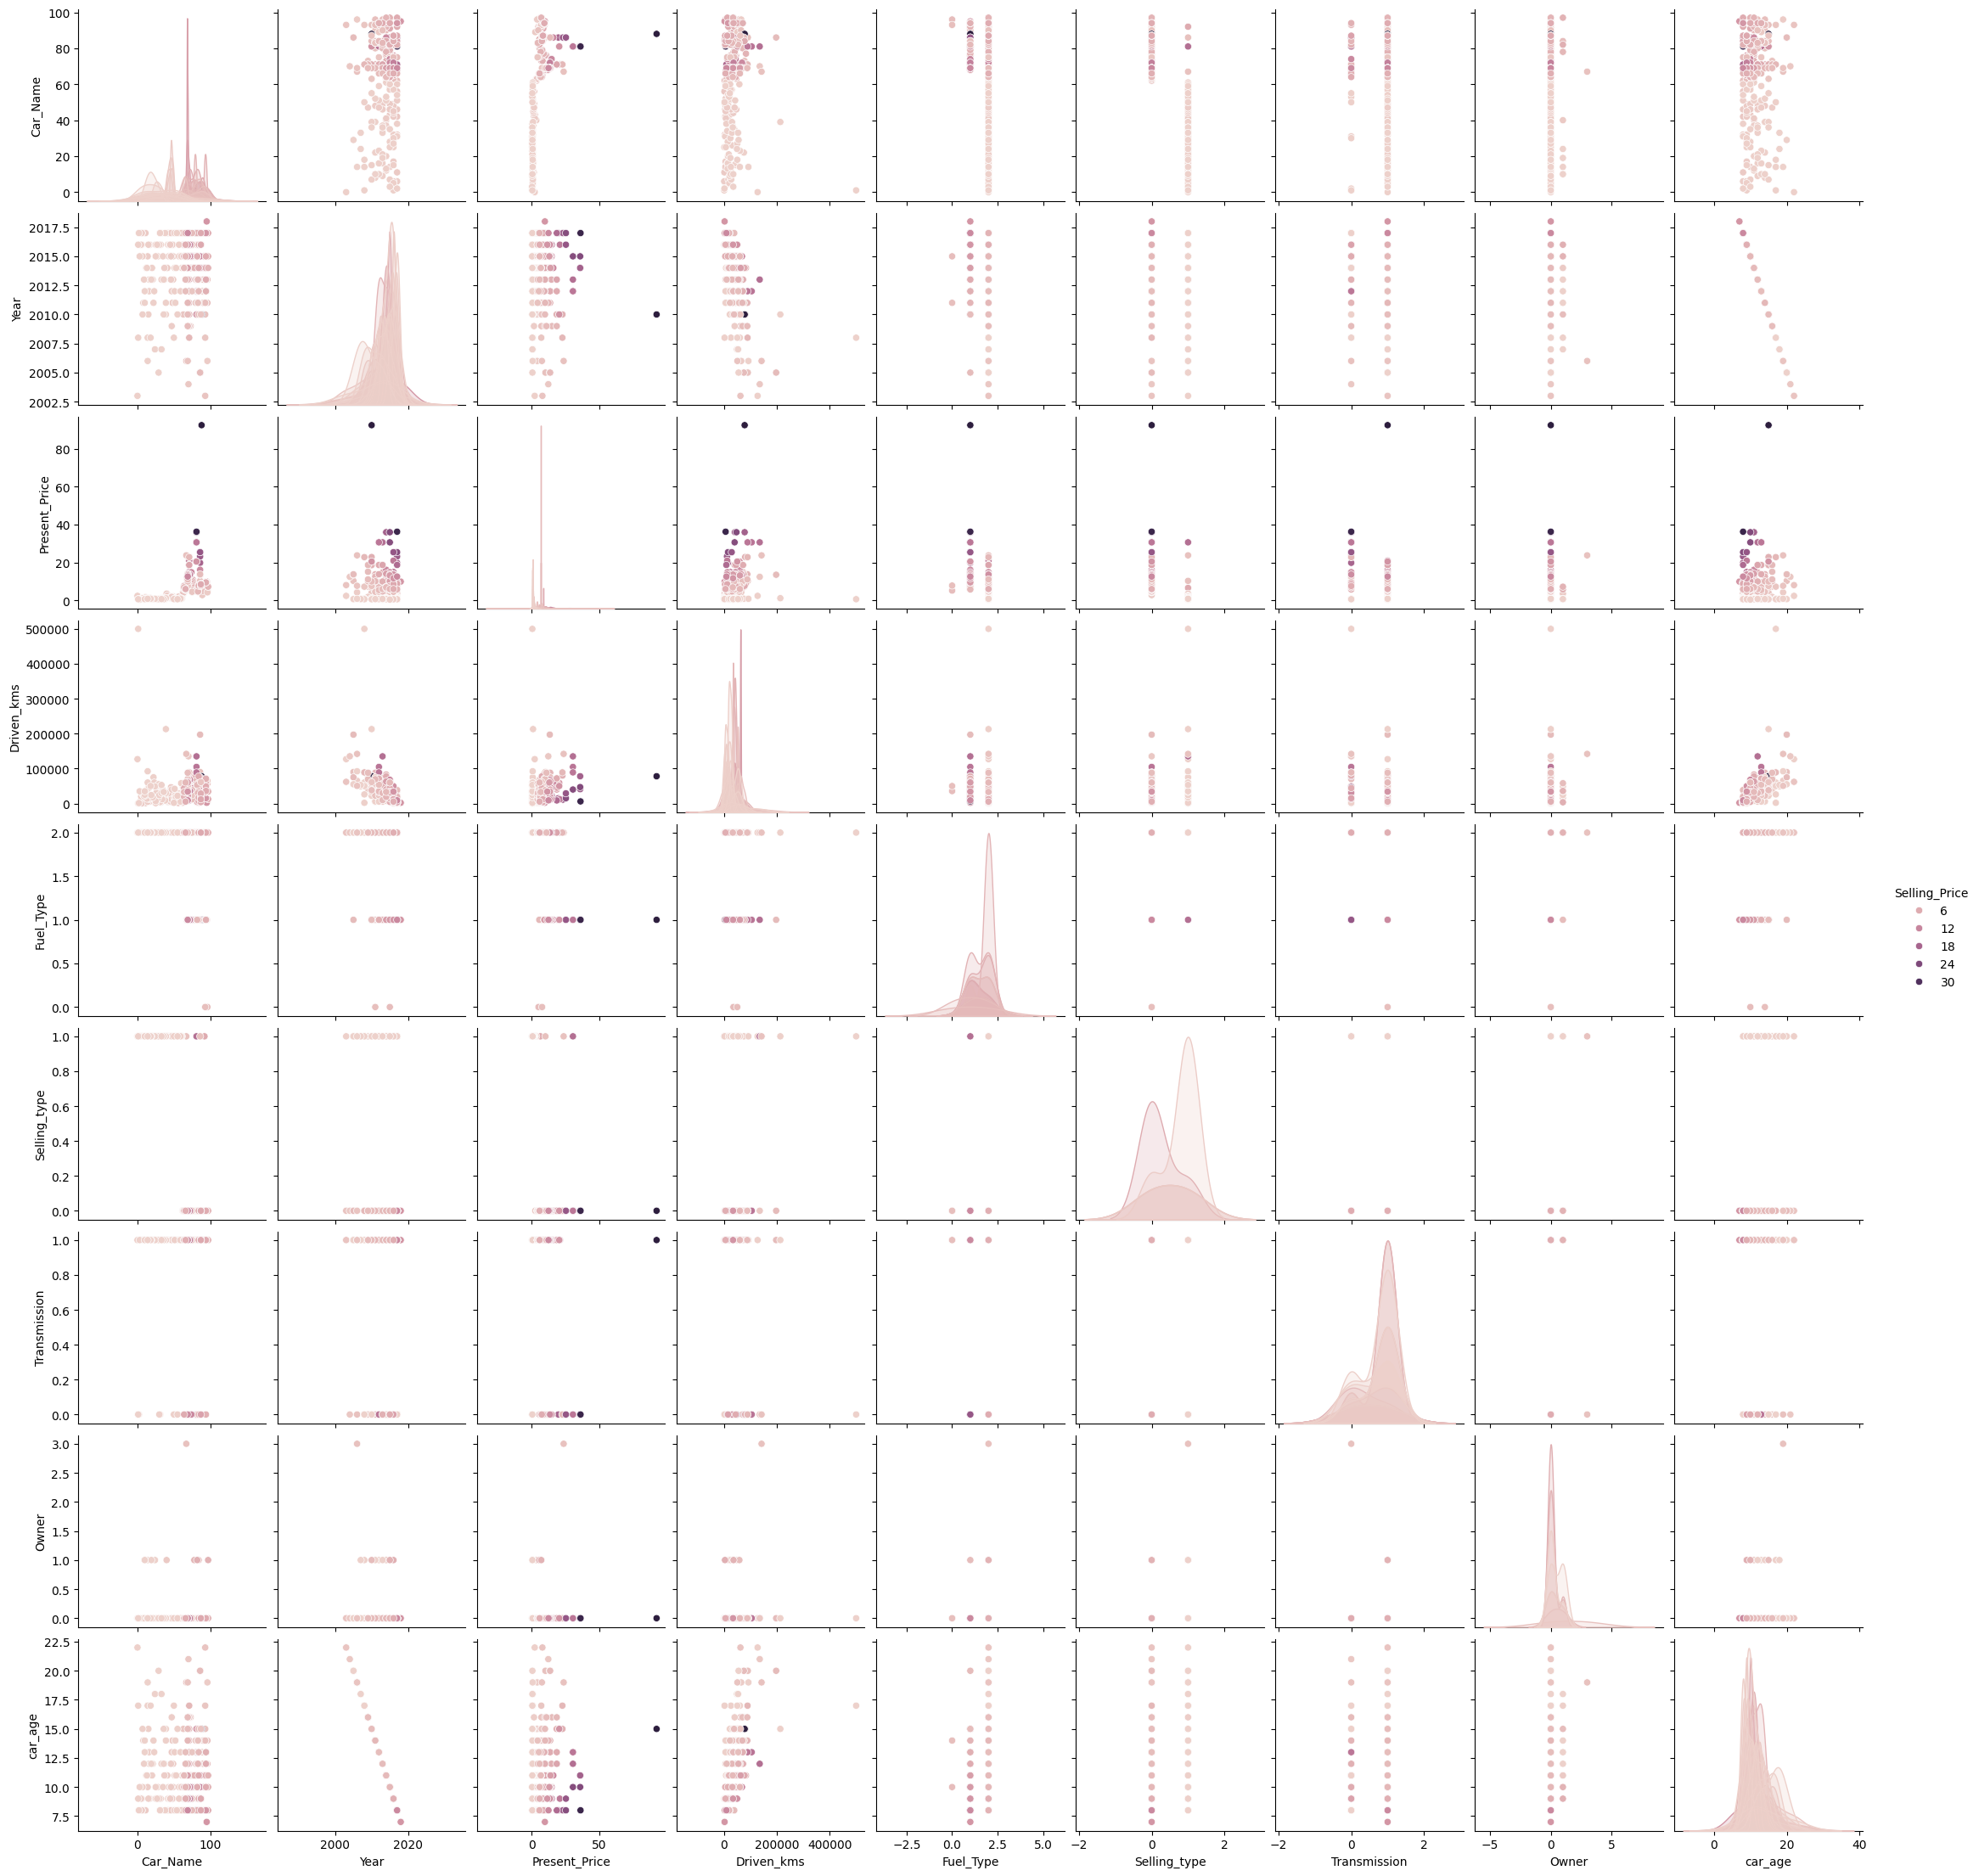

In [22]:
sns.pairplot(df,hue='Selling_Price')
plt.xlabel("Selling_Price")
plt.show()

<Axes: >

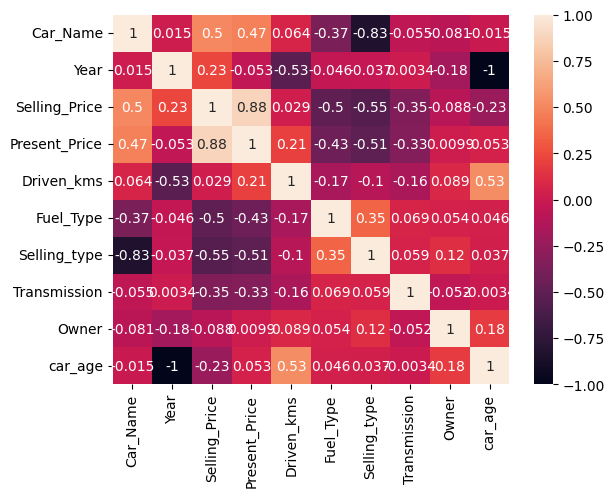

In [23]:
sns.heatmap(df[[ 'Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner', 'car_age']].corr(),annot=True)

###3.Normalize / standarize features

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
x=df.drop('Selling_Price',axis=1)
y=df['Selling_Price']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20)

In [28]:
x_train.shape,x_test.shape

((239, 9), (60, 9))

In [29]:
sc=StandardScaler()

In [30]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

###4.model building

      1.Linear Regression
      2.Random Forest Regressor

1.Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
LR=LinearRegression()

In [33]:
LR.fit(x_train,y_train)

LinearRegression()

In [34]:
LR_pred=LR.predict(x_test)

In [35]:
from sklearn.metrics import r2_score

In [36]:
LR_accuracy=r2_score(y_test,LR_pred)*100

In [37]:
LR_accuracy

80.74039608848975

2.RandomForestRegressor

In [38]:
from sklearn.ensemble import RandomForestRegressor


In [39]:
RFR=RandomForestRegressor()

In [40]:
RFR.fit(x_train,y_train)

RandomForestRegressor()

In [41]:
RFR_pred=RFR.predict(x_test)

In [42]:
from sklearn.metrics import r2_score,mean_squared_error

In [43]:
RFR_accuracy=r2_score(y_test,RFR_pred)*100

In [44]:
RFR_accuracy

91.39429099325089

In [45]:
RMSE=mean_squared_error(y_test,RFR_pred)*100

In [46]:
RMSE

407.5409477333328

In [47]:

print("Linear Regresiion:",LR_accuracy)
print("Random Forest Regressor:", RFR_accuracy)
print("mean squared error:",RMSE)


Linear Regresiion: 80.74039608848975
Random Forest Regressor: 91.39429099325089
mean squared error: 407.5409477333328


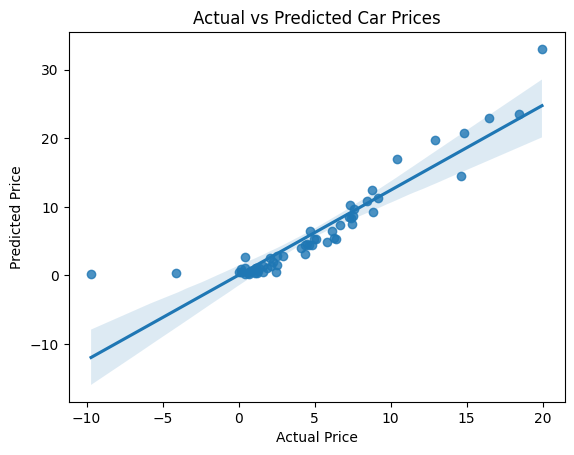

In [48]:
sns.regplot(x=LR_pred,y=y_test)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()